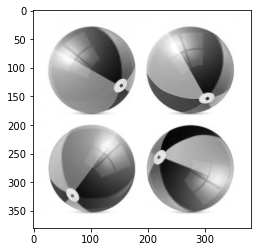

In [1]:
# Question 1
import numpy as np
import cv2
import math
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

image = cv2.imread("ball_set.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

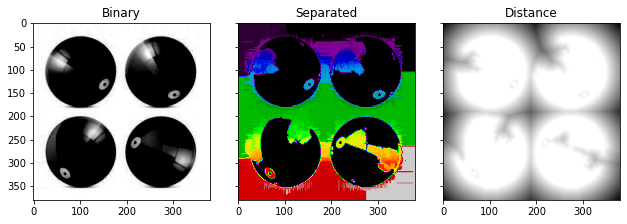

In [34]:
# Try to distinguish the ball from the back ground

# Make the graph becomes binary 
mask_filter = np.ones((3,3))
t_val, b_y_image = cv2.threshold(gray_image,0,255, cv2.THRESH_TOZERO+cv2.THRESH_OTSU)
filted_im = cv2.morphologyEx(b_y_image, cv2.MORPH_OPEN, mask_filter)

distance = ndi.distance_transform_edt(filted_im)

coords = peak_local_max(distance, footprint=mask_filter, labels=filted_im)
masks =  np.zeros(distance.shape, dtype=bool)
masks[tuple(coords.T)] = True
marker, _ = ndi.label(masks)
labels = watershed(-distance, marker, mask=filted_im)
#plt.imshow(labels, cmap='gray')

figure, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
axe = axes.ravel()

axe[0].imshow(filted_im, cmap="gray")
axe[0].set_title('Binary')
axe[1].imshow(labels, cmap=plt.cm.nipy_spectral)
axe[1].set_title('Separated')
axe[2].imshow(-distance, cmap=plt.cm.gray)
axe[2].set_title('Distance')

for a in ax:
    a.set_axis_off()

figure.tight_layout()
plt.show()

In [3]:
'''

def watershed(image):
    # Calculate the distance transform
    width, height = image.shape
    
    # Search through the pic
    for i in range(1,height-1):
        for j in range(1,width):
            dis = calculate_distance(i,j,i-1,j-1)
            minDis = min(image[i-1][j],image[i-1][j-1]+dis)
            
            dis = calculate_distance(i,j,i-1,j)
            minDis = min(minDis,image[i-1][j]+dis)
            
            dis = calculate_distance(i,j,i,j-1)
            minDis = min(minDis, image[i][j-1]+dis)
            
            dis = calculate_distance(i,j,i+1,j+1)
            minDis = min(minDis, image[i+1][j-1]+dis)
            
            image[i][j] = round(minDis)
    
    for i in range(height-2, 1, -1):
        for j in range(width-2, -1, -1):
            dis = calculate_distance(i,j,i+1,j)
            minDis = min(image[i][j], dis+image[i+1][j])
            
            dis = calculate_distance(i,j,i+1,j+1)
            minDis = min(minDis, dis+image[i+1][j+1])
            
            dis = calculate_distance(i,j,i,j+1)
            minDis = min(minDis, image[i][j+1]+dis)
            
            dis = calculate_distance(i,j,i-1,j+1)
            minDis = min(minDis, image[i-1][j+1]+dis)
            
            image[i][j] = round(minDis)
    
    return image
    

def calculate_distance(x1,y1,x2,y2):
    dist = ((x2-x1)**2 + (y2-y1)**2) ** 0.5
    return dist

'''

'\n\ndef watershed(image):\n    # Calculate the distance transform\n    width, height = image.shape\n    \n    # Search through the pic\n    for i in range(1,height-1):\n        for j in range(1,width):\n            dis = calculate_distance(i,j,i-1,j-1)\n            minDis = min(image[i-1][j],image[i-1][j-1]+dis)\n            \n            dis = calculate_distance(i,j,i-1,j)\n            minDis = min(minDis,image[i-1][j]+dis)\n            \n            dis = calculate_distance(i,j,i,j-1)\n            minDis = min(minDis, image[i][j-1]+dis)\n            \n            dis = calculate_distance(i,j,i+1,j+1)\n            minDis = min(minDis, image[i+1][j-1]+dis)\n            \n            image[i][j] = round(minDis)\n    \n    for i in range(height-2, 1, -1):\n        for j in range(width-2, -1, -1):\n            dis = calculate_distance(i,j,i+1,j)\n            minDis = min(image[i][j], dis+image[i+1][j])\n            \n            dis = calculate_distance(i,j,i+1,j+1)\n            minDis =

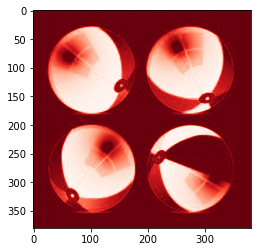

In [5]:
red,blue,green = cv2.split(image)

plt.imshow(red, cmap='Reds')

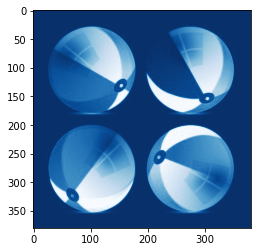

In [6]:
plt.imshow(blue, cmap='Blues')

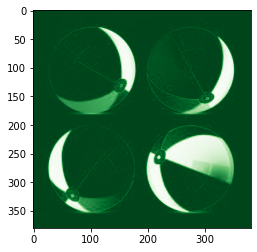

In [7]:
plt.imshow(green, cmap='Greens')

In [25]:
# Flatten the martix
red_y = red.flatten()
blue_y = blue.flatten()
green_y = green.flatten()

length = image.shape[1]*image.shape[0]
new_pic = np.zeros((3,length))
for i in range(length):
    new_pic[0][i] = red_y[i]
for i in range(length):
    new_pic[1][i] = blue_y[i]
for i in range(length):
    new_pic[2][i] = green_y[i]

In [37]:
from sklearn.cluster import estimate_bandwidth,MeanShift
from sklearn.datasets import make_classification
from numpy import unique
from matplotlib import pyplot

X, unuse = make_classification(n_samples=10000, n_features=3, n_informative=3, n_redundant=0, n_clusters_per_class=3, random_state=4)
clustering = MeanShift(bandwidth=1).fit(X)           # Perform clustering on X and returns cluster labels.

new_pic = clustering.fit_predict(new_pic)    
plt.imshow(new_pic, cmap=plt.cm.gray)

ValueError: Expected 2D array, got 1D array instead:
array=[0 1 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

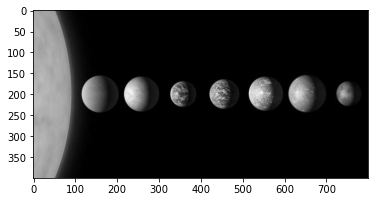

In [38]:
# Question3
image_planet = cv2.imread("planets.jpg")
gray_planet = cv2.cvtColor(image_planet, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_planet,cmap='gray')

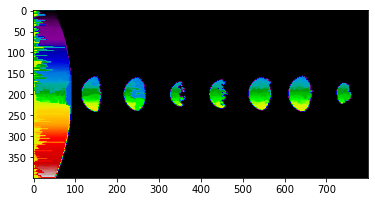

In [43]:
# Turns to binary and filte it
value, b_y_image = cv2.threshold(gray_planet,0,255, cv2.THRESH_TOZERO+cv2.THRESH_OTSU)
masks = np.ones((3,3))
filted_im = cv2.morphologyEx(b_y_image, cv2.MORPH_OPEN,masks)

# Calculate the distance 
distance = ndi.distance_transform_edt(filted_im)

# Separate the graph by the distance
coords = peak_local_max(distance, footprint=masks, labels=filted_im)
m =  np.zeros(distance.shape, dtype=bool)
m[tuple(coords.T)] = True
marker, _ = ndi.label(m)
labels = watershed(-distance, marker, mask=filted_im)

plt.imshow(labels, cmap=plt.cm.nipy_spectral)

In [45]:
# Meanfiltered
red, blue, green = cv2.split(image_planet)

redy = red.flatten()
bluey = blue.flatten()
greeny = green.flatten()

length = image.shape[1]*image.shape[0]
new_planet = np.zeros((3,length))
for i in range(length):
    new_planet[0][i] = red_y[i]
for i in range(length):
    new_planet[1][i] = blue_y[i]
for i in range(length):
    new_planet[2][i] = green_y[i]
    
    
clustering = MeanShift(bandwidth=1).fit(new_pic)
print(clustering.labels_)

clustering.fit_predict(new_pic)

ValueError: Expected 2D array, got 1D array instead:
array=[0 1 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.